In [115]:
# manipulation of data
import pandas as pd
import numpy as np

In [116]:
# for visualizations of the data 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks',color_codes=True)

In [117]:
# modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error




In [118]:
import math, random
seed = 60
random.seed(seed)
np.random.seed(seed)

In [119]:
data = pd.read_csv("adverts.csv")
data.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [120]:
#This tells us the shape of the DataSet
data.shape

(402005, 12)

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [122]:
def show_distribution(col):

#This function will make a distribution (graph) and display it

# Creating our figure for 2 subplots (2rows, 1 column)
  fig, ax = plt.subplots(2, 1, figsize = (12, 8))

# Ploting a histogram for our visualization
  ax[0].hist(col)
  ax[0].set_ylabel('Frequency in thousands')
# Ploting a histogram for our visualization
#ax[1].boxplot(col) matplotlib this was not working so i had to use seaborn
  sns.boxplot(col, orient="h" ,ax=ax[1])
  ax[1].set_xlabel('Values')
# Adding a title to the Figure
  fig.suptitle('Distribution visualization')
# Show the figure

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


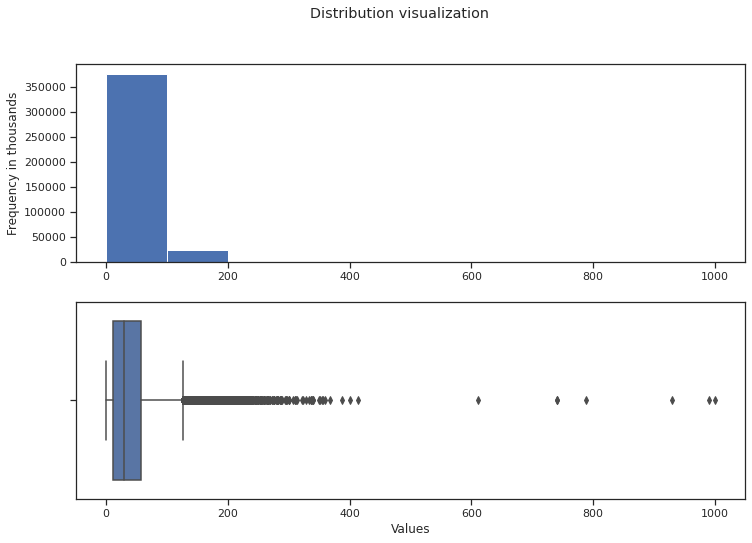

In [123]:
show_distribution(data["mileage"]/1000)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


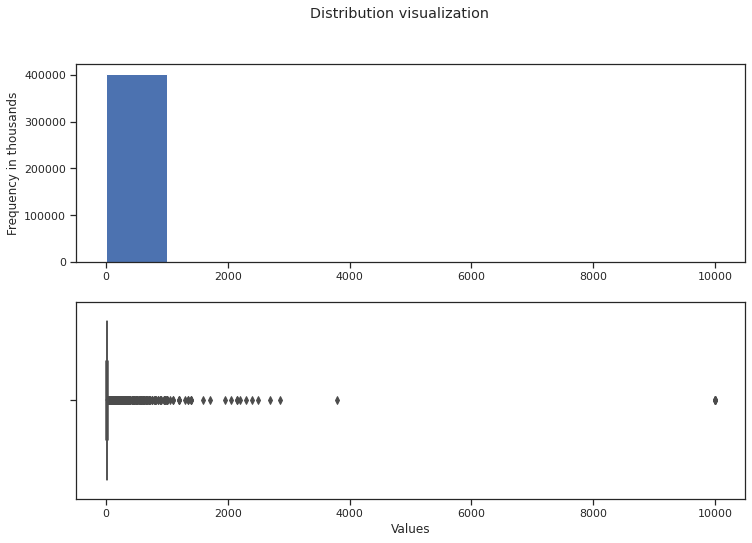

In [124]:
show_distribution(data["price"]/1000)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


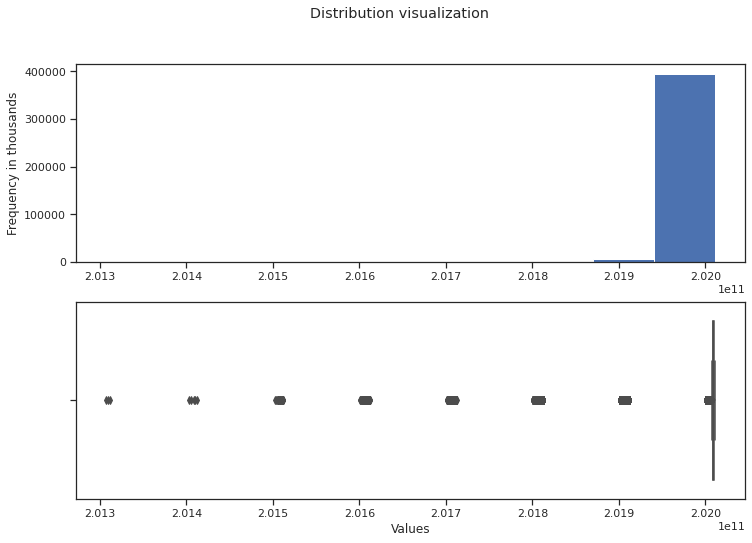

In [125]:
show_distribution(data["public_reference"]/1000)


2. Analysis of Predictive Power of Features (2-3)
3. Data Processing for Data Exploration and Visualisation (1-2)

**Data Processing for Machine Learning**
1. Dealing with Missing Values, Outliers and Noise (1-2)
2. Feature Engineering, Data Transformations, Feature Selection (2-3)


In [126]:
# plot mileage data without outliers

In [127]:
data[data.isnull().any(axis=1)]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
17,201911043995897,5.0,NaN,NaN,Nissan,X-Trail,NEW,NaN,27595,SUV,False,Diesel
19,202008272998331,0.0,NaN,White,Volkswagen,T-Cross,NEW,NaN,25000,SUV,False,Petrol
25,202008042070611,49585.0,B,NaN,Ferrari,308,USED,1984.0,54475,Convertible,False,Petrol
37,202001306737473,0.0,NaN,White,Fiat,Panda,NEW,NaN,13999,Hatchback,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
401902,202010134960554,10.0,NaN,White,BMW,3 Series,NEW,NaN,35023,Saloon,False,Petrol
401903,202010134965616,25800.0,65,NaN,Mercedes-Benz,AMG GT,USED,2016.0,65900,Coupe,False,Petrol
401905,202010144983518,0.0,NaN,Red,Land Rover,Range Rover Evoque,NEW,NaN,44995,SUV,False,Petrol
401931,202010195183847,92261.0,60,NaN,Vauxhall,Antara,USED,2010.0,3495,SUV,False,Diesel


In [128]:
data.isna().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [129]:
from sklearn.impute import SimpleImputer

In [130]:
imp = SimpleImputer()

In [131]:
# Another way to fill in my missing values
# data["mileage"] = data["mileage"].fillna(data["mileage"].median())

In [132]:
#replace missing value with the data from previous row
# data["mileage"] = data["mileage"].fillna("bfill")

In [133]:
data["mileage"] = data["mileage"].replace(np.nan, data["mileage"].mean())

In [134]:
data["fuel_type"].value_counts(dropna=False)

Petrol                   216929
Diesel                   158120
Petrol Hybrid             13602
Petrol Plug-in Hybrid      6160
Electric                   4783
Diesel Hybrid              1403
NaN                         601
Bi Fuel                     221
Diesel Plug-in Hybrid       185
Natural Gas                   1
Name: fuel_type, dtype: int64

In [135]:
data["fuel_type"] = data["fuel_type"].replace(np.nan, data["fuel_type"].mode()[0])

In [136]:
data["fuel_type"].value_counts(dropna=False)

Petrol                   217530
Diesel                   158120
Petrol Hybrid             13602
Petrol Plug-in Hybrid      6160
Electric                   4783
Diesel Hybrid              1403
Bi Fuel                     221
Diesel Plug-in Hybrid       185
Natural Gas                   1
Name: fuel_type, dtype: int64

**Outliers and Noise**

In [137]:
quant1 = data["mileage"].quantile(0.25)
quant1

10487.0

In [138]:
quant2 = data["mileage"].quantile(0.50)
quant2

28648.0

In [139]:
quant3 = data["mileage"].quantile(0.75)
quant3

56852.0

In [140]:
# percentile, quantile quartile
quant1 = data["mileage"].quantile(0.25)
quant3 = data["mileage"].quantile(0.75)
IQR = quant3 - quant1
up_lim =    quant3 + 1.5 * IQR

In [141]:
data["mileage"].min(), data["mileage"].max()

(0.0, 999999.0)

In [142]:
# All value above this is an outlier, we drop it
up_lim

126399.5

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


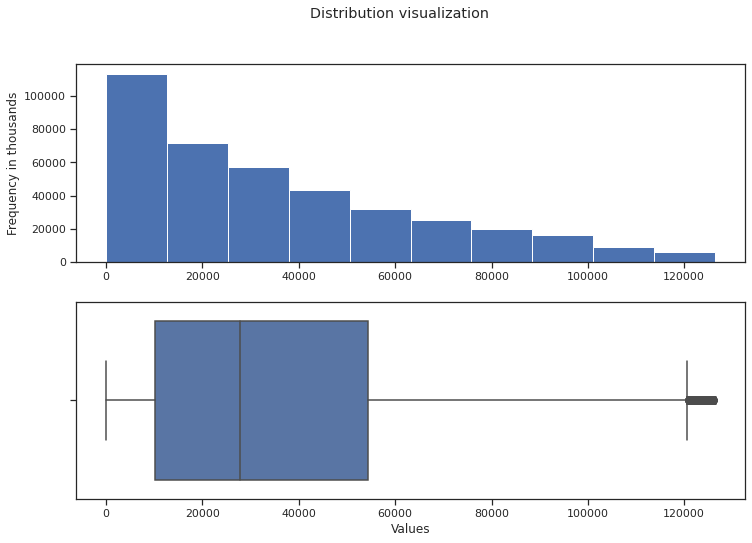

In [143]:
col = data["mileage"] < up_lim
show_distribution(data["mileage"][col])

In [144]:
quant1 = data["price"].quantile(0.25)
quant2 = data["price"].quantile(0.50)
quant3 = data["price"].quantile(0.75)
IQR = quant3 - quant1
up_lim =    quant3 + 1.5 * IQR

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


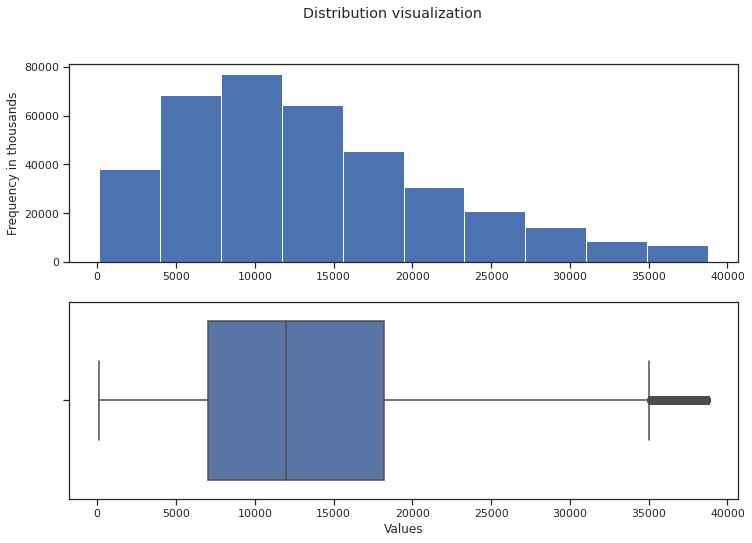

In [145]:
col = (data[data["price"] < up_lim]["price"]).reset_index(drop=True)
show_distribution(col)

**FEATURE ENGINEERING**

In [146]:
data["vehicle_condition"].value_counts()

USED    370756
NEW      31249
Name: vehicle_condition, dtype: int64

In [147]:
#Data Mapping for Data transformation
data["vehicle_condition"] = data["vehicle_condition"].map({"USED":0, "NEW":1})

In [148]:
# data transformation
### OneHotEncoder, LabelEncoder, pd.get_dummies()

In [149]:
data.head ()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,1,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,0,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,0,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,0,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,0,2015.0,26995,SUV,False,Diesel


In [150]:
#Transfroming my categorical data to numerical data
data = pd.get_dummies(data, columns=["vehicle_condition","fuel_type", "body_type", "crossover_car_and_van"])

In [151]:
data.shape

(402005, 37)

In [152]:
data.head ()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,year_of_registration,price,vehicle_condition_0,vehicle_condition_1,...,body_type_Limousine,body_type_MPV,body_type_Minibus,body_type_Panel Van,body_type_Pickup,body_type_SUV,body_type_Saloon,body_type_Window Van,crossover_car_and_van_False,crossover_car_and_van_True
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NaN,73970,0,1,...,0,0,0,0,0,1,0,0,1,0
1,202007020778260,108230.0,61,Blue,Jaguar,XF,2011.0,7000,1,0,...,0,0,0,0,0,0,1,0,1,0
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,2017.0,14000,1,0,...,0,0,0,0,0,1,0,0,1,0
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,2016.0,7995,1,0,...,0,0,0,0,0,0,0,0,1,0
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,2015.0,26995,1,0,...,0,0,0,0,0,1,0,0,1,0


In [153]:
# Dropping all object because we can use them for modelling

X = data.drop(labels= ["public_reference", "reg_code", "year_of_registration", "standard_colour", 
                  "price", "standard_model", "standard_make"], axis=1)
y = data["price"]

In [154]:
X.head

<bound method NDFrame.head of          mileage  vehicle_condition_0  vehicle_condition_1  fuel_type_Bi Fuel  \
0            0.0                    0                    1                  0   
1       108230.0                    1                    0                  0   
2         7800.0                    1                    0                  0   
3        45000.0                    1                    0                  0   
4        64000.0                    1                    0                  0   
...          ...                  ...                  ...                ...   
402000    5179.0                    1                    0                  0   
402001  110000.0                    1                    0                  0   
402002   52760.0                    1                    0                  0   
402003   10250.0                    1                    0                  0   
402004   14000.0                    1                    0                  0  

In [155]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   mileage                          402005 non-null  float64
 1   vehicle_condition_0              402005 non-null  uint8  
 2   vehicle_condition_1              402005 non-null  uint8  
 3   fuel_type_Bi Fuel                402005 non-null  uint8  
 4   fuel_type_Diesel                 402005 non-null  uint8  
 5   fuel_type_Diesel Hybrid          402005 non-null  uint8  
 6   fuel_type_Diesel Plug-in Hybrid  402005 non-null  uint8  
 7   fuel_type_Electric               402005 non-null  uint8  
 8   fuel_type_Natural Gas            402005 non-null  uint8  
 9   fuel_type_Petrol                 402005 non-null  uint8  
 10  fuel_type_Petrol Hybrid          402005 non-null  uint8  
 11  fuel_type_Petrol Plug-in Hybrid  402005 non-null  uint8  
 12  bo

In [156]:
# data ["vehicle_condition"] = data["vehicle_condition"].map({"USED":0, "NEW":1})

In [157]:
#data.dropna(axis=0, inplace=True)

**Model Building**
1. Algorithm Selection, Configuration Model and 
Instantiation.
2. Grid Search and Model Ranking and Selection

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

In [159]:
X_train.shape, y_train.shape

((321604, 30), (321604,))

**Baseline**

In [160]:
# The baseline is the mean of the y_train
y_mean = y_train.mean()
print(f"mean of my train test  (y_mean)")

y_pred_baseline = [y_mean] * len(y_train)

rmse_baseline = math.sqrt(mean_squared_error(y_train, y_pred_baseline))
print("Mean of the car price", round(y_mean, 2))
print("Baseline for RMSE:", round(rmse_baseline, 2))

mean of my train test  (y_mean)
Mean of the car price 17331.47
Baseline for RMSE: 43498.24


**Using pipeline and transformers**


In [161]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(n_estimators=50,max_depth=3, min_samples_leaf=3)
)

In [162]:
model.fit(X_train, y_train)

predictions = model.predict(X_test)

rmse = math.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error: {rmse}") 

Root Mean Squared Error: 55167.064706114055


**Without pipeline and transformers**

In [164]:
 model = RandomForestRegressor(n_estimators=150,max_depth=4, min_samples_leaf=5)

model.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=5, n_estimators=150)

In [165]:
model.score(X_train, y_train)

0.0908475204525867

In [166]:
predictions = model.predict(X_test) 

In [167]:
rmse = math.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 55005.416608924286


In [ ]:
####Grid Search

In [170]:
param_grid = {
    "n_estimators": [150],
    "max_depth": [4],
    "min_samples_leaf":[5]
}

In [171]:
grid = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, n_jobs=1, verbose=1)

In [172]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': [4], 'min_samples_leaf': [5],
                         'n_estimators': [150]},
             verbose=1)

In [173]:
grid.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'n_estimators': 150}

**Model Evaluation and Analysis**
1. Coarse-Grained Evaluation/Analysis (1-2)(e.g. withmodel scores)
2. Feature Importance(2-4)
3. Fine-Grained Evaluation (1-2) (e.g., with instance-level errors)

In [174]:
importance = model.feature_importances_

In [175]:
features = pd.DataFrame({"importance":importance}, index=X.columns)

In [176]:
features.head()

,importance
mileage,0.487966
vehicle_condition_0,0.000969
vehicle_condition_1,0.001118
fuel_type_Bi Fuel,0.000000
fuel_type_Diesel,0.025896


<Figure size 720x576 with 0 Axes>

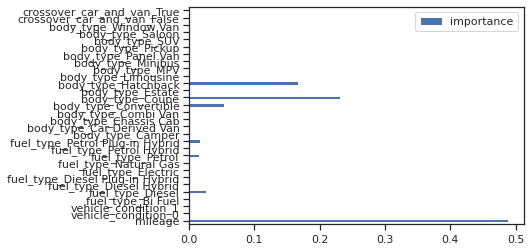

In [177]:
plt.figure(figsize=(10,8))
features.plot(kind="barh");

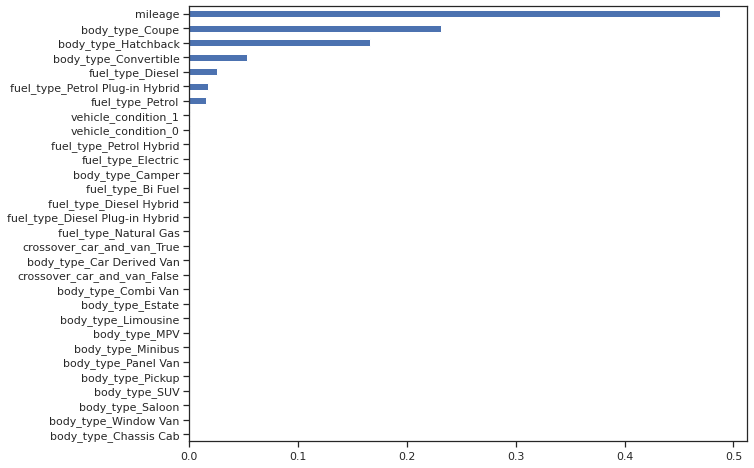

In [178]:
plt.figure(figsize=(10,8))
features["importance"].sort_values().plot(kind="barh");